In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf._version_)

In [3]:
def sinusoid(x,A,f,p):
    return A*np.sin(f*x+p)

In [7]:
def generate_data(xmin=0.0, xmax=10.0, A=1.0, f=2.0, p=1.0, s=0.25, n=100):
    #xmin is the min range of data
    #xmax is the max range of data
    #a is amplitudte
    #f is the frequency
    #p is phase
    #s is gaussian std
    #n is the number of samples

    #pick rand location between xmin and max
    x = np.asarray(np.random.uniform(low=xmin, high=xmax, size=n) ,dtype=np.float32)

    #pick random y location centered on the curve
    y = np.asarray(sinusoid(x,A,f,p) + s*np.random.randn(n), dtype=np.float32)

    y_err = np.full(n,s,dtype=np.float32)
    return x,y,y_err

In [8]:
x, y, y_err = generate_data()

(-2.0, 2.0)

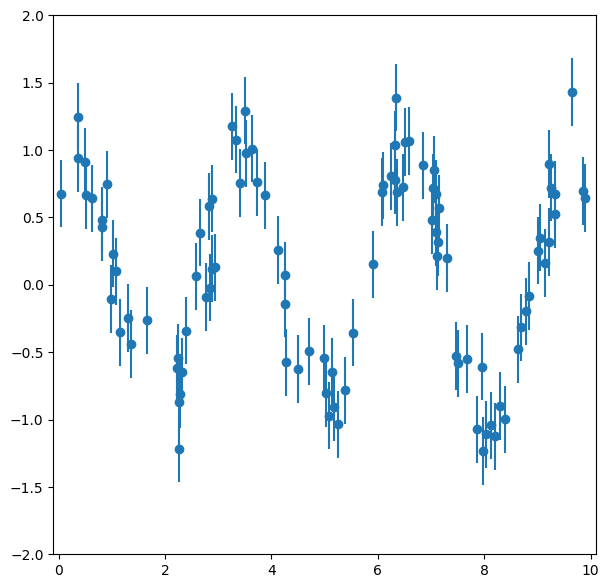

In [13]:
f,ax = plt.subplots(1, 1, figsize=(7,7))
#for tick in ax.xaxis.get_ticktables():
 #   tick.set_fontsize(20)
#for tick in ax.yaxis.get_ticktables():
 #   tick.set_fontsize(20)
ax.errorbar(x,y,y_err, fmt='o', label='Data')
ax.set_xlim([-0.1,10.1])
ax.set_ylim([-2.,2])

In [14]:
A_init = 2.0
A_fit = tf.Variable(A_init,name='amplitude')

f_init = 2.0
f_fit = tf.Variable(f_init, name='frequency')

p_init = 0.5
p_fit = tf.Variable(p_init, name='phase')

In [15]:
@tf.function
def sinusoidal_model(x):
    return A_fit*tf.math.sin(f_fit*x + p_fit)

In [16]:
@tf.function
def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

In [18]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

In [23]:
epochs = 5000
display_step = 1000

for epoch in range(epochs):
    if((epoch%display_step)==0):
        pred = sinusoidal_model(x)
        loss = mse(pred, y)

        print(f"Epoch {epoch} | Loss {loss.numpy()}, A:{A_fit.numpy()} f:{f_fit.numpy()} p:{p_fit.numpy()}")
    with tf.GradientTape() as g:
        pred = sinusoidal_model(x)
        loss = mse(y,pred)
    gradients = g.gradient(loss, [A_fit, f_fit, p_fit])
    optimizer.apply_gradients(zip(gradients,[A_fit,f_fit,p_fit]))

print(f"Epoch{epochs} | Loss{loss.numpy()}, A: {A_fit.numpy()}, f: {f_fit.numpy()}, p:{p_fit.numpy()}")
print("Done!")

Epoch 0 | Loss 0.8449400067329407, A:2.0 f:2.0 p:0.5
Epoch 1000 | Loss 0.09211645275354385, A:1.264135479927063 f:2.0204036235809326 p:0.8844419121742249
Epoch 2000 | Loss 0.05040694773197174, A:1.0051252841949463 f:2.0157501697540283 p:0.9177553057670593
Epoch 3000 | Loss 0.04990750178694725, A:0.9741633534431458 f:2.018324851989746 p:0.9012748599052429
Epoch 4000 | Loss 0.049906954169273376, A:0.9733900427818298 f:2.0185842514038086 p:0.8995855450630188
Epoch5000 | Loss0.049906980246305466, A: 0.9733878374099731, f: 2.0185861587524414, p:0.8995736837387085
Done!
